<a href="https://colab.research.google.com/github/eileenrmartin/introClimateDataSci/blob/main/intro_climate_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deliverables: 

1. introduction material to the climate problem
2. basic ability to retrieve and read data from online open repository
3. examples of a few basic plots 
4. basic intro to how to read data values out of an array, and how to find max and min values in arrays
5. set of questions for student exploration

**Introduction:**
Carbon dioxide (CO2) is an important greenhouse gas that helps to trap heat in our atmosphere. Atmospheric CO2 makes Earth hospitable, however, an modern increases in CO2 concentrations are causing average global temperatures to rise. Atmospheric CO2 concentrations have varied substantially throughout geologic history. In this exercise, we will construct a composite record of atmospheric CO2 from 800,000 years ago to present to observe how the increase in CO2 in our modern record is unprecendented in the context of geological history. 

**Data science specific learning goals**
By completing this exercise, you will gain the ability to:
1. Retrieve and read data from an online open repository
2. Generate basic plots of data
3. Interrogate data in an array (e.g., read values, find max/min)

**Climate science specific learning goals**
By completing this exercise you will: 
1. Be able to relate seasonal and long-term trends in atmospheric CO2 to fluxes in the carbon cycle
2. Gain an understanding of consequences of increasing CO2 levels (e.g., climate change and ocean acidification)
3. Be able to make predictions about future trends in atmospheric CO2 concentrations 

In [23]:
import pandas as pd                    # lets us access tools for working with many data values (data frames)
import matplotlib.pyplot as plt        # lets us access tools for plotting
%matplotlib inline                   
# line above ensures that plots are interative (e.g. can zoom with buttons)
import sklearn as skl                  # lets us access tools for data fitting and machine learning
import numpy as np

**Data:**
All data for this exercise are available [here](https://keelingcurve.ucsd.edu/permissions-and-data-sources/). Below you will grab data from the web using [!wget](https://en.wikipedia.org/wiki/Wget)

In [3]:
#Data from 800,000 to 1958
!wget https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt

#Data from 1958 to today
!wget https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv

--2022-06-23 14:04:23--  https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.172, 205.167.25.178, 205.167.25.168, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107462 (105K) [text/plain]
Saving to: ‘edc-co2-2008.txt’

edc-co2-2008.txt    100%[===================>] 104.94K  --.-KB/s    in 0.09s   

2022-06-23 14:04:24 (1.19 MB/s) - ‘edc-co2-2008.txt’ saved [107462/107462]

--2022-06-23 14:04:24--  https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv
Resolving scrippsco2.ucsd.edu (scrippsco2.ucsd.edu)... 169.228.224.138
Connecting to scrippsco2.ucsd.edu (scrippsco2.ucsd.edu)|169.228.224.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77907 (76K) [text/csv]
Saving to: ‘monthly_in_situ_co2_mlo.csv’

monthly_in_

*Read the files you downloaded and store the data in Pandas data frames.* 

First we will work with ice core data in a text (txt) file. These data contain measurements of CO2 from 800,000 years ago to ~present. Present when we think about ice core data does *NOT* mean today, but rather 1950. So keep in mind while you look through these data that the yrBP column actually means years before 1950. 

These data are generated by measuring the composition of air trapped in bubbles of Antarctic ice cores. You can read more about ice core records in [this paper.](https://https://www.nature.com/articles/nature06949) 

In [65]:
txtFilename = 'edc-co2-2008.txt'
ancientData = pd.read_csv(txtFilename, delimiter=r'\s+', skiprows=773, header=None)   # read the actual data values
print("The number of (measurements, attributes) in these data is: "+str(ancientData.shape))
headersRaw = pd.read_csv(txtFilename, delimiter=r'\s+', skiprows=773, nrows=1, header=None)   # read the headers, with long ones on multiple lines
headers = headersRaw.sum(axis=0)    # add (append) the text for each header that's split across rows
print(headers)
ancientData = pd.read_csv(txtFilename, delimiter=r'\s+', skiprows=774, names=list(headers))   # read the actual data values
print("The number of (measurement times, attributes) in these data is: "+str(ancientData.shape))


The number of (measurements, attributes) in these data is: (1097, 2)
0    Age(yrBP)
1    CO2(ppmv)
dtype: object
The number of (measurement times, attributes) in these data is: (1096, 2)


*Now you can take a look at your data frame*

In [60]:
print(ancientData)

      Age(yrBP)  CO2(ppmv)
0           137      280.4
1           268      274.9
2           279      277.9
3           395      279.1
4           404      281.9
...         ...        ...
1091     794608      199.4
1092     795202      195.2
1093     796467      189.3
1094     797099      188.4
1095     798512      191.0

[1096 rows x 2 columns]


You can see that you have 1096 rows of data in two columns. The first column contains information about the age and the second contains the CO2 concentration associated with that age. 

*Next, let's make a quick plot of these data. Note that we reversed the x axis so that we can visualize the oldest data (~800,000 yrBP) on the left and the most recent data (0 yrBP) on the right.* 

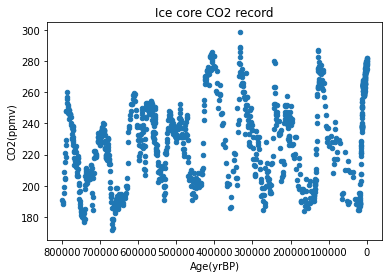

In [63]:
ax = ancientData.plot.scatter(x='Age(yrBP)',y='CO2(ppmv)')
ax.set_title("Ice core CO2 record")
plt.gca().invert_xaxis()
plt.show()

**Question 1**: What are your first observations of these data?

Next we will work with monthly measurements of atmospheric CO2 from the Mauna Loa Observatory. You may be familiar with these data if you have ever heard of the [Keeling Curve](https://keelingcurve.ucsd.edu/category/keeling-curve-history/). These data are stored as a comma-separated-value (csv) file. Note that time here is recorded as the year and month that each measurement was taken. 

In [52]:
# Now, read in the csv file
csvFilename = 'monthly_in_situ_co2_mlo.csv'
headersRaw = pd.read_csv(csvFilename, skiprows=54, nrows=3, header=None)   # read the headers, with long ones on multiple lines
headers = headersRaw.sum(axis=0)    # add (append) the text for each header that's split across rows
headersClean = [thisHdr.replace(" ","") for thisHdr in list(headers)] # replace spaces with nothing
# print the headers to see what attributes are measured
print("The "+str(headers.size)+" headers are: \n")
print(headersClean)
recentData = pd.read_csv(csvFilename, skiprows=57, names=headersClean)   # read the actual data values
print("The number of (measurement times, attributes) in these data is: "+str(recentData.shape))

The 10 headers are: 

['Yr', 'Mn', 'DateExcel', 'Date', 'CO2[ppm]', 'seasonallyadjusted[ppm]', 'fit[ppm]', 'seasonallyadjustedfit[ppm]', 'CO2filled[ppm]', 'seasonallyadjustedfilled[ppm]']
The number of (measurement times, attributes) in these data is: (780, 10)


*Now you can take a look at your data frame*

In [59]:
print(recentData)

       Yr  Mn  DateExcel       Date  CO2[ppm]  seasonallyadjusted[ppm]  \
0    1958   1      21200  1958.0411    -99.99                   -99.99   
1    1958   2      21231  1958.1260    -99.99                   -99.99   
2    1958   3      21259  1958.2027    315.71                   314.44   
3    1958   4      21290  1958.2877    317.45                   315.16   
4    1958   5      21320  1958.3699    317.51                   314.70   
..    ...  ..        ...        ...       ...                      ...   
775  2022   8      44788  2022.6219    -99.99                   -99.99   
776  2022   9      44819  2022.7068    -99.99                   -99.99   
777  2022  10      44849  2022.7890    -99.99                   -99.99   
778  2022  11      44880  2022.8740    -99.99                   -99.99   
779  2022  12      44910  2022.9562    -99.99                   -99.99   

     fit[ppm]  seasonallyadjustedfit[ppm]  CO2filled[ppm]  \
0      -99.99                      -99.99         

This dataset contains more columns....[blah blah talk about something here]

*And we can make a quick plot to look at these data, too!*

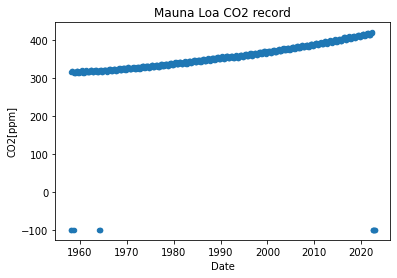

In [66]:
ax = recentData.plot.scatter(x='Date',y='CO2[ppm]')
ax.set_title("Mauna Loa CO2 record")
plt.show()

You will notice in this plot that there are a few obviously erroneous datapoints that record negative CO2 concentrations. These values are easy to ignore with your eye, so just go ahead and ignore them for now. 

**Question 2**: How do these data from the observational era compare to the ancient dataset we worked with from ice cores?

*Before we combine these two datasets, we need to make sure time is on the same axis. To do this we need to convert the ice core data to standard calendar years by subtracting age from 1950.*

In [73]:
present = 1950
ancientData['Date'] = present - ancientData['Age(yrBP)']
print("New ancientData is: \n")
print(ancientData)

New ancientData is: 

      Age(yrBP)  CO2[ppm]    Date
0           137     280.4    1813
1           268     274.9    1682
2           279     277.9    1671
3           395     279.1    1555
4           404     281.9    1546
...         ...       ...     ...
1091     794608     199.4 -792658
1092     795202     195.2 -793252
1093     796467     189.3 -794517
1094     797099     188.4 -795149
1095     798512     191.0 -796562

[1096 rows x 3 columns]


*Now let's append the two data frames into a new one that contains all of the CO2 data from 800,000 years ago to today*

In [74]:
ancientData.rename(columns={'CO2(ppmv)': 'CO2[ppm]'}, inplace=True)
DateAndCO2 = ['Date', 'CO2[ppm]']
data = pd.concat([ancientData[DateAndCO2],recentData[DateAndCO2]])
print(data)

          Date  CO2[ppm]
0    1813.0000    280.40
1    1682.0000    274.90
2    1671.0000    277.90
3    1555.0000    279.10
4    1546.0000    281.90
..         ...       ...
775  2022.6219    -99.99
776  2022.7068    -99.99
777  2022.7890    -99.99
778  2022.8740    -99.99
779  2022.9562    -99.99

[1876 rows x 2 columns]


We can also take a minute to get rid of those erroneous negative values we found when we plotted the Mauna Loa record. 

In [75]:
# first, find the indices of which CO2[ppm] data were junk (negative) values
whereNegative = data[data['CO2[ppm]'] < 0].index # grabs the index of each negative CO2 reading in the data frame 
print("The indices of measurements with negative values are: \n"+str(whereNegative))
# now drop those entries from the data frame
data.drop(whereNegative, inplace=True)

The indices of measurements with negative values are: 
Int64Index([0, 1, 5, 9, 73, 74, 75, 773, 774, 775, 776, 777, 778, 779], dtype='int64')


*And now we can look at all of the data together unobstructed by the erroneous measurements*

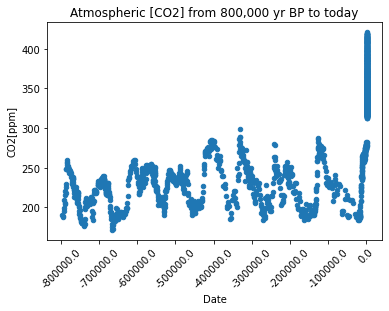

In [79]:
ax = data.plot.scatter(x='Date',y='CO2[ppm]')
ax.set_title("Atmospheric [CO2] from 800,000 yr BP to today")
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
plt.show()

**Question 3**: Revisit your answer to Q2. What differences do you observe between these datasets now that they are plotted together? Where do the lowest CO2 concentrations occur? What about the highest?

*Next we will search our dataframe to find the maximum and minimum CO2 concentrations in our composite record*

In [82]:
column=data["CO2[ppm]"]
min_value = column.min()
print(min_value)

column=data["CO2[ppm]"]
max_value = column.max()
print(max_value)

171.6
420.78


We can also search our dataframe to figure out when those concentrations occured.